For L = 5 m, the oil outlet temperature is 42.90 C
The log mean temperature difference is 65.64 C
The arithmetic mean temperature difference is 66.05 C
For L = 100 m, the oil outlet temperature is 99.68 C
The log mean temperature difference is 13.69 C
The arithmetic mean temperature difference is 37.66 C


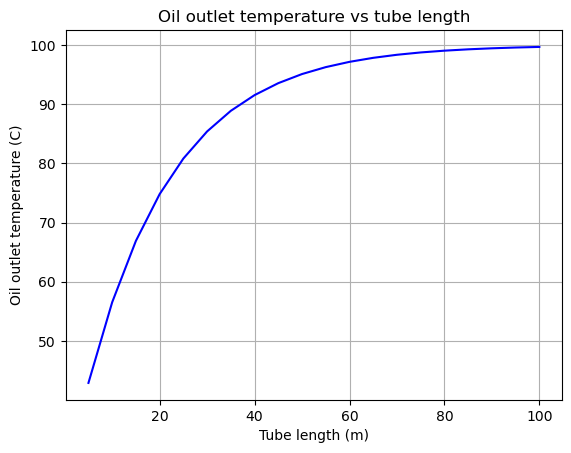

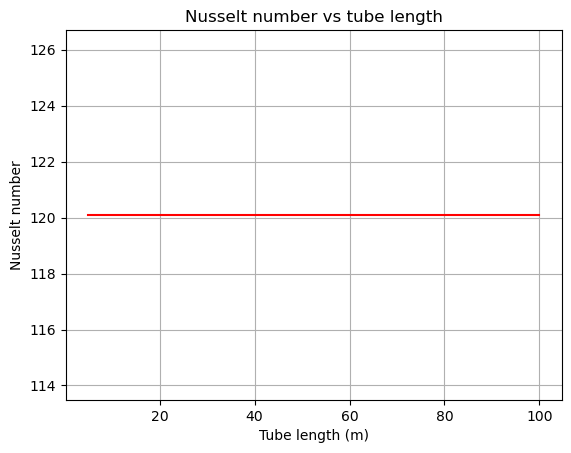

In [49]:
# Import modules
import math
import matplotlib.pyplot as plt

# Define constants
D = 0.025 # Tube diameter in m
m_dot = 0.5 # Mass flow rate in kg/s
T_s = 100 # Tube surface temperature in C
T_i = 25 # Oil inlet temperature in C
k = 0.138 # Thermal conductivity of oil in W/m.K
mu = 0.00048 # Dynamic viscosity of oil in N.s/m2
rho = 884.1 # Density of oil in kg/m3
c_p = 1.909 # Specific heat of oil in kJ/kg.K
Pr = 0.7 # Prandtl number of oil

# Define functions
def h(D, m_dot, mu, k, Pr): # Heat transfer coefficient
    Re = 4 * m_dot / (math.pi * D * mu) # Reynolds number
    Nu = 0.023 * Re**0.8 * Pr**0.4 # Nusselt number
    return Nu * k / D

def LMTD(T_s, T_i, T_o): # Log mean temperature difference
    return (T_s - T_o - (T_s - T_i)) / math.log((T_s - T_o) / (T_s - T_i))

def T_o(T_s, T_i, L, m_dot, c_p, h): # Oil outlet temperature
    return T_s - (T_s - T_i) * math.exp(-math.pi * D * L * h / (m_dot * c_p * 1000))

def Nu(D, m_dot, mu, k, Pr, L): # Nusselt number
    Re = 4 * m_dot / (math.pi * D * mu) # Reynolds number
    return h(D, m_dot, mu, k, Pr) * D / k

# Part (a)
L1 = 5 # Tube length in m
L2 = 100 # Tube length in m
h1 = h(D, m_dot, mu, k, Pr) # Heat transfer coefficient
T_o1 = T_o(T_s, T_i, L1, m_dot, c_p, h1) # Oil outlet temperature for L1
T_o2 = T_o(T_s, T_i, L2, m_dot, c_p, h1) # Oil outlet temperature for L2
LMTD1 = LMTD(T_s, T_i, T_o1) # Log mean temperature difference for L1
LMTD2 = LMTD(T_s, T_i, T_o2) # Log mean temperature difference for L2
AMTD1 = (T_s - T_i + T_s - T_o1) / 2 # Arithmetic mean temperature difference for L1
AMTD2 = (T_s - T_i + T_s - T_o2) / 2 # Arithmetic mean temperature difference for L2

print("For L = 5 m, the oil outlet temperature is {:.2f} C".format(T_o1))
print("The log mean temperature difference is {:.2f} C".format(LMTD1))
print("The arithmetic mean temperature difference is {:.2f} C".format(AMTD1))
print("For L = 100 m, the oil outlet temperature is {:.2f} C".format(T_o2))
print("The log mean temperature difference is {:.2f} C".format(LMTD2))
print("The arithmetic mean temperature difference is {:.2f} C".format(AMTD2))

# Part (b)
L = list(range(5, 101, 5)) # List of tube lengths in m
T_o = [T_o(T_s, T_i, l, m_dot, c_p, h1) for l in L] # List of oil outlet temperatures in C
Nu = [Nu(D, m_dot, mu, k, Pr, l) for l in L] # List of Nusselt numbers

plt.figure(1)
plt.plot(L, T_o, 'b-')
plt.xlabel('Tube length (m)')
plt.ylabel('Oil outlet temperature (C)')
plt.title('Oil outlet temperature vs tube length')
plt.grid(True)

plt.figure(2)
plt.plot(L, Nu, 'r-')
plt.xlabel('Tube length (m)')
plt.ylabel('Nusselt number')
plt.title('Nusselt number vs tube length')
plt.grid(True)
plt.show()

In [47]:
import math


# Define constants and parameters
rho_air = 1.204 # kg/m3
rho_w = 1000 # kg/m3
Cd = 0.98 # discharge coefficient
d = 0.05 # m, throat diameter
D = 0.18 # m, duct diameter
h = 0.40 # m, differential height
g = 9.81 # m/s2, gravitational acceleration

# Calculate diameter ratio, throat area, and pressure drop
beta = d / D # dimensionless
A = 0.25 * math.pi * d**2 # m2, throat area
delta_P = (rho_w - rho_air) * g * h # Pa, pressure drop

# Calculate volume flow rate, mass flow rate, and average velocity
V_dot = Cd * A * math.sqrt((2 * delta_P) / (rho_air * (1 - beta**4))) # m3/s, volume flow rate
m_dot = rho_air * V_dot # kg/s, mass flow rate
V_avg = V_dot / (0.25 * math.pi * D**2) # m/s, average velocity

# Print the results
print("The maximum volume flow rate is {:.4f} m3/s".format(V_dot))
print("The maximum mass flow rate is {:.4f} kg/s".format(m_dot))
print("The average flow velocity is {:.4f} m/s".format(V_avg))

The maximum volume flow rate is 0.1557 m3/s
The maximum mass flow rate is 0.1875 kg/s
The average flow velocity is 6.1196 m/s
